In [1]:
import pandas as pd
import os
import numpy as np

# Обрабатываем ставочки из блумберга

In [2]:
files_bad = [file for file in os.listdir() if os.path.isfile(file) and file[-5:] != 'ipynb']
files_bad.sort()
files = files_bad[2:]
files.append(files_bad[1])

In [3]:
first = True
for i in range(len(files)):
    data = pd.read_excel(files[i])[::-1].reset_index(drop=True).set_index('Date')
    data.columns = [files[i][:-5]]
    if first:
        rates = data
        first = False
    else:
        rates = rates.merge(data, on='Date', how='outer', sort=True)
    

In [4]:
rates

,rates_1_year,rates_2_year,rates_3_year,rates_4_year,rates_5_year,rates_6_year,rates_7_year,rates_8_year,rates_9_year,rates_10_year
Date,,,,,,,,,,
2015-03-02,16.9900,15.400,14.6500,14.200,13.910,13.7019,13.56,13.460,13.390,13.350
2015-03-03,17.0400,15.380,14.6500,14.180,13.900,13.7000,13.56,13.450,13.380,13.345
2015-03-04,NaN,15.295,14.5600,14.100,13.790,13.5900,13.46,13.360,13.290,13.245
2015-03-05,16.4000,14.945,14.2500,13.880,13.550,13.3500,13.20,13.030,12.970,13.035
2015-03-06,16.0500,14.410,13.7500,13.340,13.090,12.9200,12.77,12.680,12.620,12.580
...,...,...,...,...,...,...,...,...,...,...
2016-02-15,12.1326,11.760,11.5600,11.460,11.410,11.4325,11.39,11.265,11.245,11.390
2016-02-16,12.1303,11.780,11.5800,11.480,11.430,11.3925,11.41,11.165,11.145,11.180
2016-02-17,12.1222,11.780,11.5400,11.480,11.340,NaN,11.36,11.145,11.125,11.360


In [8]:
rates.columns = np.arange(1, 11)

In [9]:
rates[0] = 0
rates = rates.reindex(sorted(rates.columns), axis=1)
rates.head()

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2015-03-02,0,16.99,15.400,14.65,14.20,13.91,13.7019,13.56,13.46,13.39,13.350
2015-03-03,0,17.04,15.380,14.65,14.18,13.90,13.7000,13.56,13.45,13.38,13.345
2015-03-04,0,NaN,15.295,14.56,14.10,13.79,13.5900,13.46,13.36,13.29,13.245
2015-03-05,0,16.40,14.945,14.25,13.88,13.55,13.3500,13.20,13.03,12.97,13.035
2015-03-06,0,16.05,14.410,13.75,13.34,13.09,12.9200,12.77,12.68,12.62,12.580


In [71]:
rates.to_excel('all_rates.xlsx')

# Ставки из ЦБ

In [16]:
rates = pd.read_excel('/Users/freezylex/Desktop/курсач/cbr_rates.xlsx', parse_dates = True, index_col = 'Date')
rates[0] = rates[0.25]
rates

,0.00,0.25,0.50,0.75,1.00,2.00,3.00,5.00,7.00,10.00,15.00,20.00,30.00
Date,,,,,,,,,,,,,
2015-03-02,0.1354,0.1354,0.1367,0.1380,0.1391,0.1429,0.1452,0.1458,0.1413,0.1303,0.1172,0.1094,0.1015
2015-03-03,0.1241,0.1241,0.1275,0.1307,0.1332,0.1387,0.1398,0.1380,0.1336,0.1258,0.1151,0.1077,0.0990
2015-03-04,0.1277,0.1277,0.1295,0.1312,0.1328,0.1374,0.1394,0.1386,0.1347,0.1276,0.1179,0.1108,0.1019
2015-03-05,0.1266,0.1266,0.1281,0.1296,0.1310,0.1351,0.1365,0.1356,0.1324,0.1266,0.1177,0.1107,0.1019
2015-03-06,0.1211,0.1211,0.1237,0.1261,0.1281,0.1331,0.1350,0.1348,0.1322,0.1269,0.1182,0.1112,0.1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0.0892,0.0892,0.0944,0.0977,0.0997,0.1025,0.1030,0.1031,0.1025,0.1011,0.1003,0.1004,0.1008
2016-02-16,0.0900,0.0900,0.0954,0.0983,0.0999,0.1017,0.1026,0.1033,0.1029,0.1018,0.1010,0.1009,0.1010
2016-02-17,0.0917,0.0917,0.0971,0.0994,0.1003,0.1012,0.1020,0.1024,0.1019,0.1009,0.1003,0.1003,0.1006


In [41]:
rates.describe().to_excel('describe_rates.xlsx')

In [17]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2015-03-02 to 2016-02-19
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     245 non-null    float64
 1   0.25    245 non-null    float64
 2   0.5     245 non-null    float64
 3   0.75    245 non-null    float64
 4   1.0     245 non-null    float64
 5   2.0     245 non-null    float64
 6   3.0     245 non-null    float64
 7   5.0     245 non-null    float64
 8   7.0     245 non-null    float64
 9   10.0    245 non-null    float64
 10  15.0    245 non-null    float64
 11  20.0    245 non-null    float64
 12  30.0    245 non-null    float64
dtypes: float64(13)
memory usage: 26.8 KB


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

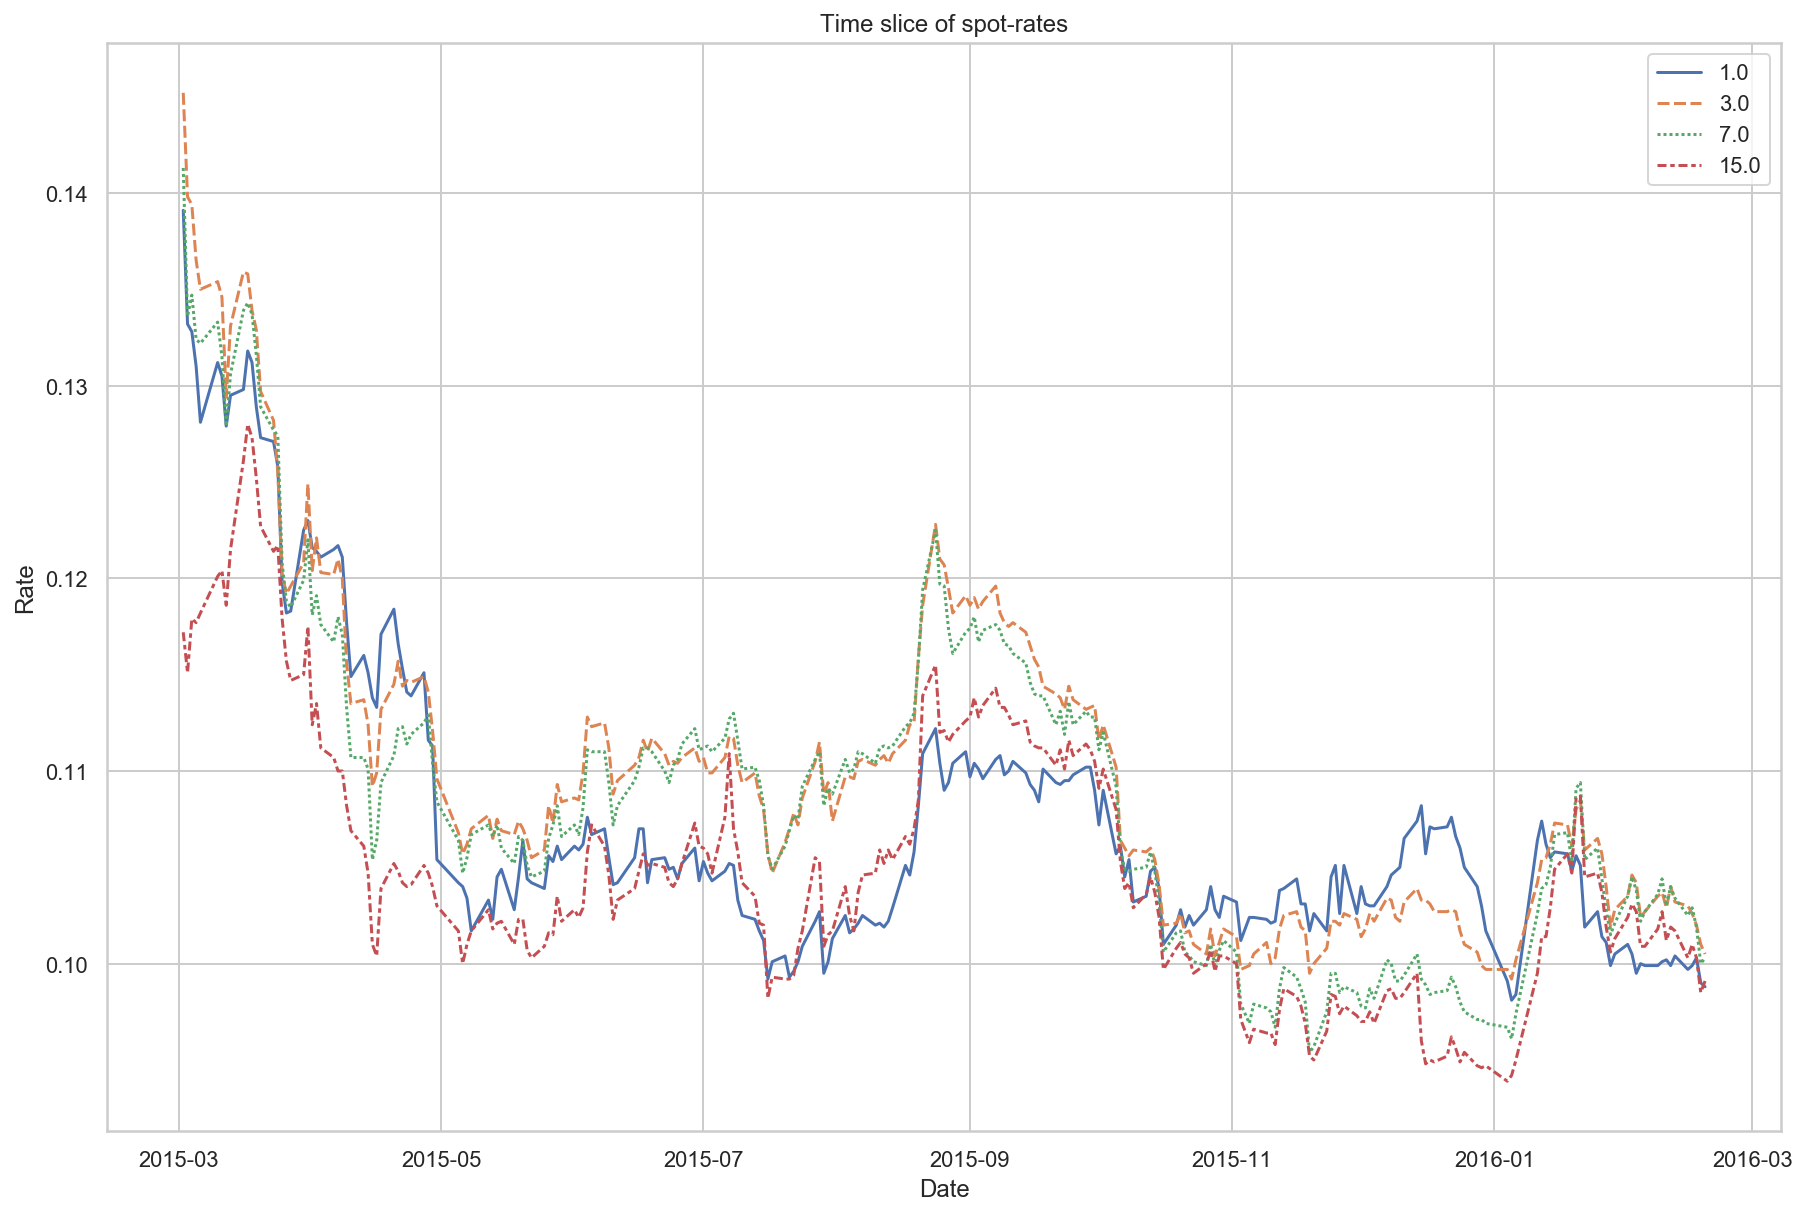

In [39]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data = rates[[1,3,7, 15]])
plt.ylabel('Rate')
plt.title('Time slice of spot-rates')
plt.savefig('rates.png', dpi=300)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Предположим, у меня есть какой-то конкретный бонд и какая-то конкретная дата

In [3]:
rates = pd.read_excel('/Users/freezylex/Desktop/курсач/rates/all_rates.xlsx', parse_dates = True, index_col='Date')
rates

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2015-03-02,0,16.9900,15.400,14.6500,14.200,13.910,13.7019,13.56,13.460,13.390,13.350
2015-03-03,0,17.0400,15.380,14.6500,14.180,13.900,13.7000,13.56,13.450,13.380,13.345
2015-03-04,0,NaN,15.295,14.5600,14.100,13.790,13.5900,13.46,13.360,13.290,13.245
2015-03-05,0,16.4000,14.945,14.2500,13.880,13.550,13.3500,13.20,13.030,12.970,13.035
2015-03-06,0,16.0500,14.410,13.7500,13.340,13.090,12.9200,12.77,12.680,12.620,12.580
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0,12.1326,11.760,11.5600,11.460,11.410,11.4325,11.39,11.265,11.245,11.390
2016-02-16,0,12.1303,11.780,11.5800,11.480,11.430,11.3925,11.41,11.165,11.145,11.180
2016-02-17,0,12.1222,11.780,11.5400,11.480,11.340,NaN,11.36,11.145,11.125,11.360


In [4]:
rates = rates / 100
rates

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2015-03-02,0.0,0.169900,0.15400,0.146500,0.14200,0.13910,0.137019,0.1356,0.13460,0.13390,0.13350
2015-03-03,0.0,0.170400,0.15380,0.146500,0.14180,0.13900,0.137000,0.1356,0.13450,0.13380,0.13345
2015-03-04,0.0,NaN,0.15295,0.145600,0.14100,0.13790,0.135900,0.1346,0.13360,0.13290,0.13245
2015-03-05,0.0,0.164000,0.14945,0.142500,0.13880,0.13550,0.133500,0.1320,0.13030,0.12970,0.13035
2015-03-06,0.0,0.160500,0.14410,0.137500,0.13340,0.13090,0.129200,0.1277,0.12680,0.12620,0.12580
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-15,0.0,0.121326,0.11760,0.115600,0.11460,0.11410,0.114325,0.1139,0.11265,0.11245,0.11390
2016-02-16,0.0,0.121303,0.11780,0.115800,0.11480,0.11430,0.113925,0.1141,0.11165,0.11145,0.11180
2016-02-17,0.0,0.121222,0.11780,0.115400,0.11480,0.11340,NaN,0.1136,0.11145,0.11125,0.11360


In [8]:
rates.isna().sum() / len(rates)

0     0.000000
1     0.411765
2     0.050980
3     0.054902
4     0.058824
5     0.003922
6     0.086275
7     0.050980
8     0.086275
9     0.078431
10    0.074510
dtype: float64

In [6]:
105/255

0.4117647058823529

In [8]:
import datetime
from tqdm import tqdm

In [8]:
rates.loc[day].name

Timestamp('2015-03-02 00:00:00')

In [6]:
import autoreload

In [7]:
%load_ext autoreload

In [12]:
#%autoreload 2
from bond_pricer import Bond, Discount_Factor

# ---------------------------------

In [9]:
import json
file = open('/Users/freezylex/Desktop/курсач/bonds_info.json', 'r')
data_bonds = json.load(file)


def make_payments(json_file, ticker):
    index = pd.to_datetime(json_file[ticker]['payments'])
    coupons = json_file[ticker]['sum_of_coupon']
    coupons[-1] += json_file[ticker]['redemption_size']
    payments = pd.Series(index=index,
                         data=coupons)
    return payments

ticker = 'SU26209RMFS'
payments = make_payments(data_bonds, ticker)
payments

2013-01-30      37.9
2013-07-31      37.9
2014-01-29      37.9
2014-07-30      37.9
2015-01-28      37.9
2015-07-29      37.9
2016-01-27      37.9
2016-07-27      37.9
2017-01-25      37.9
2017-07-26      37.9
2018-01-24      37.9
2018-07-25      37.9
2019-01-23      37.9
2019-07-24      37.9
2020-01-22      37.9
2020-07-22      37.9
2021-01-20      37.9
2021-07-21      37.9
2022-01-19      37.9
2022-07-20    1037.9
dtype: float64

In [86]:
data_bonds

{'SU26214RMFS': {'payments': ['04.12.2013',
   '04.06.2014',
   '03.12.2014',
   '03.06.2015',
   '02.12.2015',
   '01.06.2016',
   '30.11.2016',
   '31.05.2017',
   '29.11.2017',
   '30.05.2018',
   '28.11.2018',
   '29.05.2019',
   '27.11.2019',
   '27.05.2020'],
  'coupon_size': 6.4,
  'sum_of_coupon': [31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91,
   31.91],
  'redemption_size': 1000,
  'issue_date': '05.06.2013',
  'times_per_year': 2,
  'redemption_date': '27.05.2020'},
 'SU26215RMFS': {'payments': ['26.02.2014',
   '27.08.2014',
   '25.02.2015',
   '26.08.2015',
   '24.02.2016',
   '24.08.2016',
   '22.02.2017',
   '23.08.2017',
   '21.02.2018',
   '22.08.2018',
   '20.02.2019',
   '21.08.2019',
   '19.02.2020',
   '19.08.2020',
   '17.02.2021',
   '18.08.2021',
   '16.02.2022',
   '17.08.2022',
   '15.02.2023',
   '16.08.2023'],
  'coupon_size': 7.0,
  'sum_of_coupon': [33.56,
   34.9,
   34.9,
   

In [47]:
info = pd.DataFrame(data_bonds).T
info = info[['coupon_size', 'redemption_size', 'issue_date', 'redemption_date','times_per_year']]
info

,coupon_size,redemption_size,issue_date,redemption_date,times_per_year
SU26214RMFS,6.4,1000,05.06.2013,27.05.2020,2
SU26215RMFS,7,1000,04.09.2013,16.08.2023,2
SU26216RMFS,6.7,1000,13.11.2013,15.05.2019,2
SU26217RMFS,7.5,1000,28.10.2015,18.08.2021,2
SU26218RMFS,8.5,1000,28.10.2015,17.09.2031,2
SU26203RMFS,6.9,1000,04.08.2010,03.08.2016,2
SU26204RMFS,7.5,1000,23.03.2011,15.03.2018,2
SU26205RMFS,7.6,1000,13.04.2011,14.04.2021,2
SU26206RMFS,7.4,1000,08.06.2011,14.06.2017,2
SU26207RMFS,8.15,1000,22.02.2012,03.02.2027,2


In [56]:
from datetime import timedelta

In [67]:
info['redemption_date'] = pd.to_datetime(info['redemption_date'])
info['issue_date'] = pd.to_datetime(info['issue_date'])

info['period'] = (info.redemption_date - info.issue_date)/np.timedelta64(365, 'D')

In [83]:
info['left'] = (info.redemption_date - pd.to_datetime('2015-03-02'))/np.timedelta64(365, 'D')

In [84]:
info = info.sort_values('left')
info

,coupon_size,redemption_size,issue_date,redemption_date,times_per_year,period,left
SU26203RMFS,6.9,1000,2010-04-08,2016-03-08,2,5.920548,1.019178
SU26206RMFS,7.4,1000,2011-08-06,2017-06-14,2,5.860274,2.287671
SU26204RMFS,7.5,1000,2011-03-23,2018-03-15,2,6.983562,3.038356
SU26208RMFS,7.5,1000,2012-07-03,2019-02-27,2,6.657534,3.994521
SU26216RMFS,6.7,1000,2013-11-13,2019-05-15,2,5.504110,4.205479
SU26210RMFS,6.8,1000,2012-12-19,2019-11-12,2,6.901370,4.701370
SU26214RMFS,6.4,1000,2013-05-06,2020-05-27,2,7.063014,5.241096
SU26205RMFS,7.6,1000,2011-04-13,2021-04-14,2,10.010959,6.123288
SU26217RMFS,7.5,1000,2015-10-28,2021-08-18,2,5.810959,6.468493
SU26209RMFS,7.6,1000,2012-01-08,2022-07-20,2,10.536986,7.389041


In [85]:
info.to_excel('bonds_data_for_word.xlsx')

In [9]:
coupon = data_bonds[ticker]['coupon_size']
times = data_bonds[ticker]['times_per_year']
issue_date = data_bonds[ticker]['issue_date']
redemp_date = data_bonds[ticker]['redemption_date']

In [10]:
year_finish, month_finish, day_finish = ([int(el) for el in redemp_date.split('.')][::-1])
year_start, month_start, day_start = ([int(el) for el in issue_date.split('.')][::-1])

start = datetime.datetime(year_start, month_start, day_start)
end = datetime.datetime(year_finish, month_finish, day_finish)

In [13]:
bond = Bond(coupons=coupon,
           times_per_year=times,
           face_value=1000,
           issue_date=start,
           redemption_date=end,
           payments=payments)


# -----------------------------------------

In [14]:
def return_difference(now, red_date):
    now = pd.to_datetime(now)
    red_date = pd.to_datetime(red_date)
    delta = (red_date - now)/datetime.timedelta(days = 365)
    return delta

In [15]:
prices = []
for date in tqdm(rates.index):
    now = rates.loc[date].name.date()
    diff_in_years = return_difference(now, bond.redemption_date)
    rates_to_take = rates.columns[rates.columns < diff_in_years + 1]
    rates_dis = rates[rates_to_take].loc[date]
    df = Discount_Factor(rates = rates_dis,
                        date = datetime.datetime(now.year, now.month, now.day),
                        curr_bond = bond)
    prices.append(df.price_bond())

100%|██████████| 245/245 [00:01<00:00, 130.08it/s]


In [16]:
price_bond = pd.DataFrame(index=rates.index,
         data = prices, columns=['calculated'])
price_bond

,calculated
Date,
2015-03-02,720.919591
2015-03-03,747.337409
2015-03-04,744.208075
2015-03-05,752.939164
2015-03-06,754.619578
...,...
2016-02-15,887.518574
2016-02-16,886.495993
2016-02-17,890.233509


In [17]:
some_data = pd.read_excel('/Users/freezylex/Downloads/quotes_20210511-2.xlsx', parse_dates=True,
                         index_col='Дата')[::-1]
some_data = some_data[['Indicative']] * 10
some_data.index.rename('Date', inplace=True)

In [18]:
info = some_data.merge(price_bond, on='Date')
info

,Indicative,calculated
Date,,
2015-03-18,736.69998,751.116630
2015-03-19,747.60002,758.282587
2015-03-20,751.29997,768.548194
2015-03-23,756.90002,773.295721
2015-03-24,766.29997,775.657019
...,...,...
2016-02-15,887.60000,887.518574
2016-02-16,885.40000,886.495993
2016-02-17,889.50000,890.233509


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


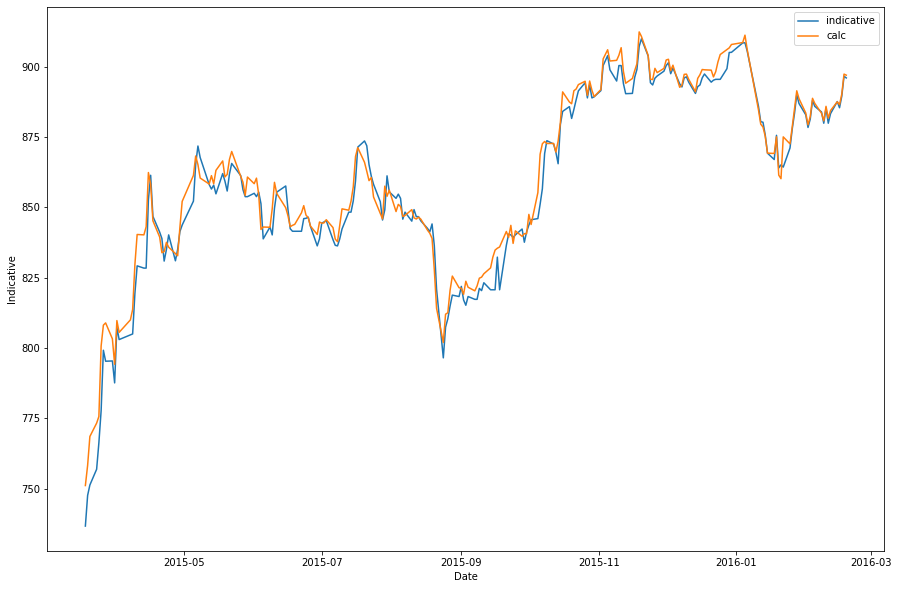

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=info.index, y = info.Indicative, label='indicative')
sns.lineplot(x=info.index, y = info.calculated, label='calc')
plt.legend()
plt.show()

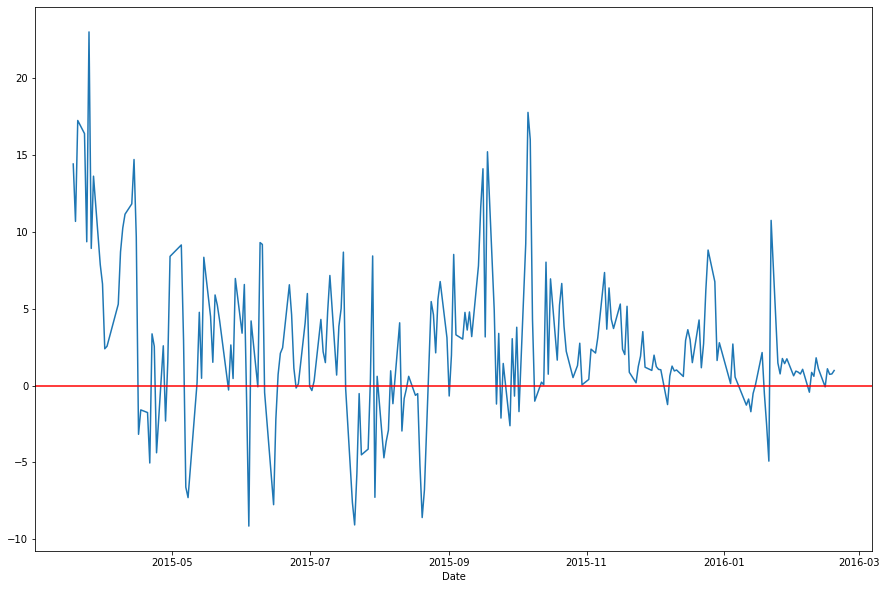

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=info.index, y = (info.calculated - info.Indicative))
plt.axhline(0, color='r')
plt.show()

In [23]:
differ = info.calculated - info.Indicative
differ

Date
2015-03-18    14.416650
2015-03-19    10.682567
2015-03-20    17.248224
2015-03-23    16.395701
2015-03-24     9.357049
                ...    
2016-02-15    -0.081426
2016-02-16     1.095993
2016-02-17     0.733509
2016-02-18     0.760559
2016-02-19     0.982108
Length: 231, dtype: float64

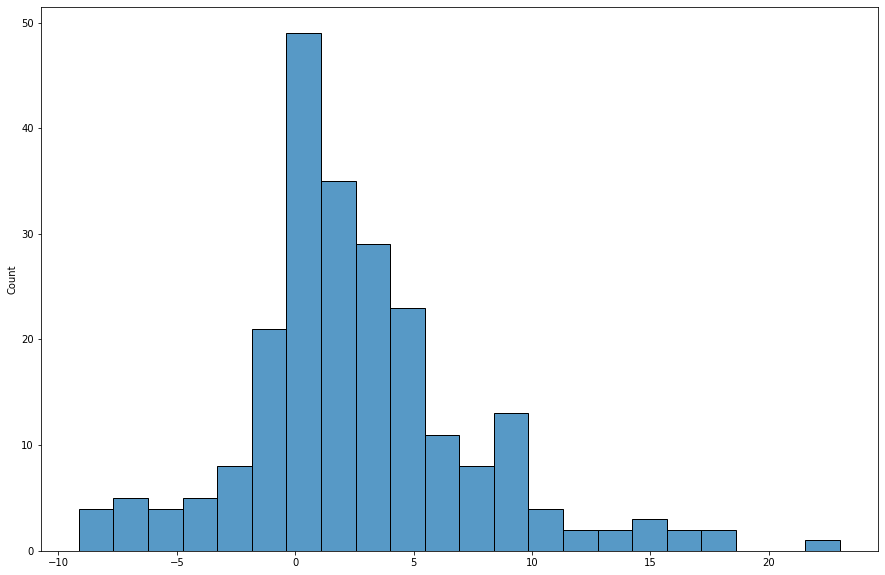

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(differ.values)
plt.show()